# WQU Msc Financial Engineering Financial Data GWP 1

### Money at a fixed rate for an unsecured purchase: 

Datasets to obtain: 
1. Credit Card Default Rates in the US for the past 8 years.
2. Interest Rates in the US for the past 8 years.
3. Unemployment rates in the US for the past 8 years.

In [85]:
#import dependencies 
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Fetch The Data:

Since the credit default data is not available on Yahoo Finance, we will download the datasets using Pandas Datareader, using the FRED API. 

In [30]:
#import the credit default data: 

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
credit_card_defaults_df = web.DataReader('DRCCLACBS', 'fred', start, end)

credit_card_defaults_df.reset_index(inplace=True)
credit_card_defaults_df


,DATE,DRCCLACBS
0,2016-01-01,2.14
1,2016-04-01,2.21
2,2016-07-01,2.30
3,2016-10-01,2.37
4,2017-01-01,2.39
5,2017-04-01,2.48
6,2017-07-01,2.55
7,2017-10-01,2.49
8,2018-01-01,2.48
9,2018-04-01,2.49


In [25]:
# Fetch the The Bank Prime Lending Rate from FRED:

# Define the date range, shift dates to align with default quarters
start = datetime(2015, 10, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
bank_prime_rates_df = web.DataReader('DPRIME', 'fred', start, end)

#resample the data to quarterly 

bank_prime_rates_df = bank_prime_rates_df.resample('Q').mean()


bank_prime_rates_df.reset_index(inplace=True)

#drop the last two rows to align with the default rate data
bank_prime_rates_df = bank_prime_rates_df.drop(bank_prime_rates_df.index[-2:])
bank_prime_rates_df

,DATE,DPRIME
0,2015-12-31,3.290323
1,2016-03-31,3.500000
2,2016-06-30,3.500000
3,2016-09-30,3.500000
4,2016-12-31,3.545082
5,2017-03-31,3.798387
6,2017-06-30,4.046154
7,2017-09-30,4.250000
8,2017-12-31,4.294355
9,2018-03-31,4.528226


In [26]:
# Fetch the Unemployment in The US Rate from FRED:

# Define the date range, shift dates to align with default quarters
start = datetime(2015, 10, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
unemployment_df = web.DataReader('UNRATE', 'fred', start, end)

#resample the data to quarterly 

unemployment_df = unemployment_df.resample('Q').mean()

unemployment_df.reset_index(inplace=True)

#drop the last two rows to align with the credit defaults data
unemployment_df = unemployment_df.drop(unemployment_df.index[-2:])
unemployment_df



,DATE,UNRATE
0,2015-12-31,5.033333
1,2016-03-31,4.900000
2,2016-06-30,4.933333
3,2016-09-30,4.900000
4,2016-12-31,4.766667
5,2017-03-31,4.566667
6,2017-06-30,4.366667
7,2017-09-30,4.333333
8,2017-12-31,4.166667
9,2018-03-31,4.033333


In [34]:
#combine the three dataframes into one dataframe for analysis

combined_df = credit_card_defaults_df.copy()
combined_df.rename(columns={'DRCCLACBS': 'credit_default_rate'}, inplace=True)
combined_df['interest_rate'] = bank_prime_rates_df['DPRIME']
combined_df['unemployment_rate'] = unemployment_df['UNRATE']
combined_df

,DATE,credit_default_rate,interest_rate,unemployment_rate
0,2016-01-01,2.14,3.290323,5.033333
1,2016-04-01,2.21,3.500000,4.900000
2,2016-07-01,2.30,3.500000,4.933333
3,2016-10-01,2.37,3.500000,4.900000
4,2017-01-01,2.39,3.545082,4.766667
5,2017-04-01,2.48,3.798387,4.566667
6,2017-07-01,2.55,4.046154,4.366667
7,2017-10-01,2.49,4.250000,4.333333
8,2018-01-01,2.48,4.294355,4.166667
9,2018-04-01,2.49,4.528226,4.033333


### Analyze the Data:

In [40]:
combined_df.describe()

,DATE,credit_default_rate,interest_rate,unemployment_rate
count,34,34.000000,34.000000,34.000000
mean,2020-02-15 06:21:10.588235264,2.370000,4.774223,4.671569
min,2016-01-01 00:00:00,1.540000,3.250000,3.500000
25%,2018-01-23 12:00:00,2.117500,3.345766,3.708333
50%,2020-02-15 12:00:00,2.465000,4.272177,3.983333
75%,2022-03-09 12:00:00,2.580000,5.356731,4.900000
max,2024-04-01 00:00:00,3.250000,8.500000,13.000000
std,NaN,0.433037,1.716763,1.847323


#### 1. Credit Default Rates:

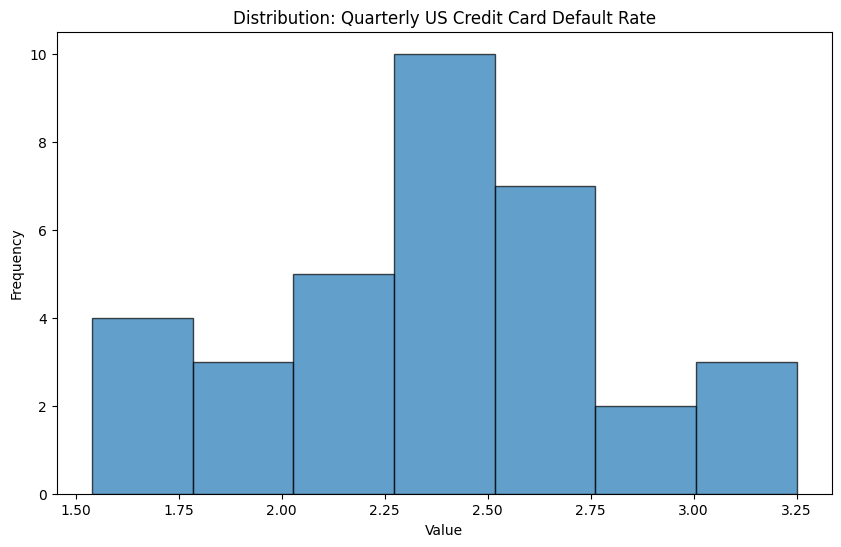

In [55]:
# Analyze the distribution of the credit default rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['credit_default_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US Credit Card Default Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above graph shows the distribution of the quarterly average credit card default rate for the United States.  This shows us that on average the credit card default rate is somewhere between 1.5% - 3.25% with the most common default rate between 2.25% - 2.50%. 


In [173]:
# Analyze the US credit card default rates over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['credit_default_rate'], marker='o', color='blue', label='Credit Card Default Rate')

# Add titles and labels
plt.title('US Credit Card Defaults Time Series')
plt.xlabel('Date')
plt.ylabel('Credit Card Default Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

AttributeError: 'DataFrame' object has no attribute 'DATE'

<Figure size 1000x600 with 0 Axes>

The time series plot above shows that credit card default rates have increased dramatically in recent months, which would indicate that there is currently a large risk in offering unsecured loans. 


#### 2. US Prime Lending Rates :

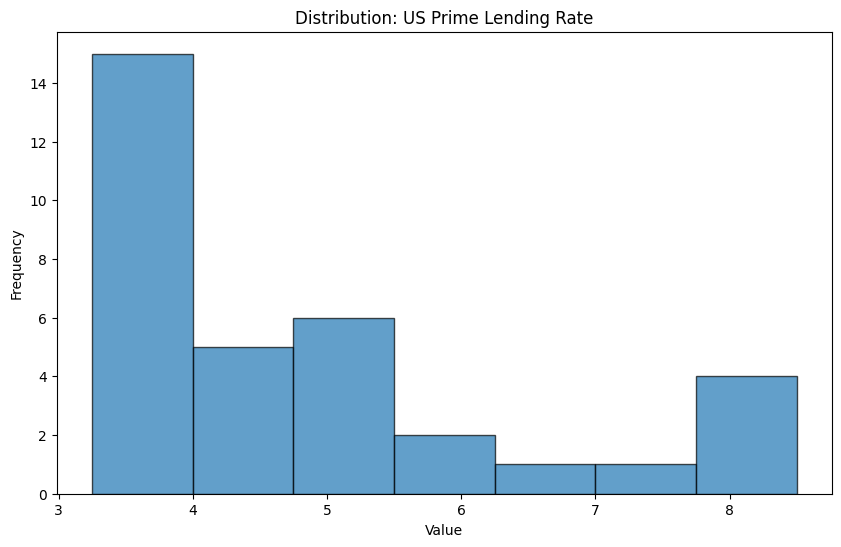

In [70]:
#Analyze the distribution of the US Prime Lending Rate per quarter 

plt.figure(figsize=(10, 6))
plt.hist(combined_df['interest_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: US Prime Lending Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above graph shows the distribution of the quarterly prime lending rate in the United States between 2016 and 2024. It shows that on average the rate is between 3% and 8%. 


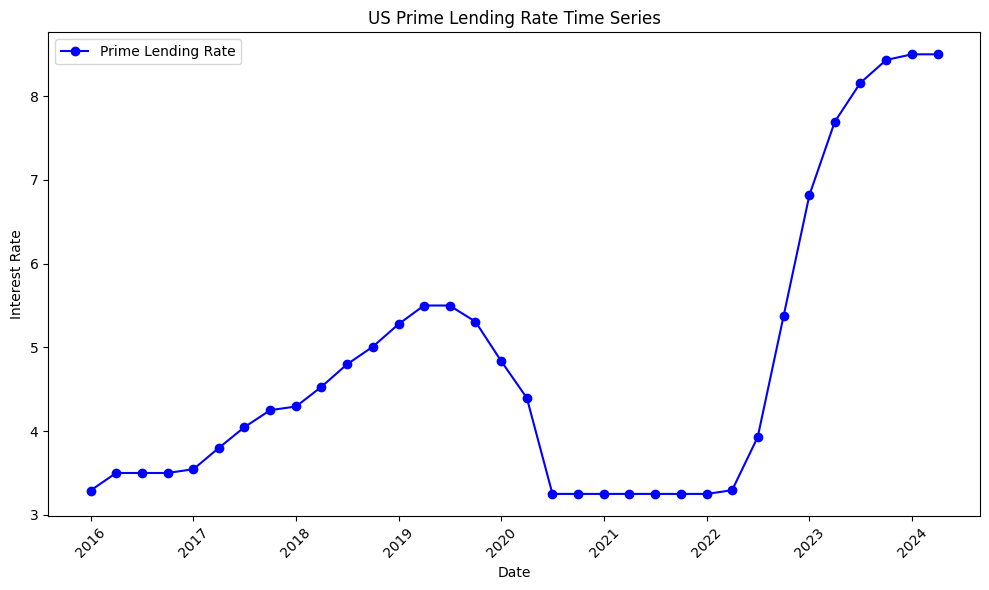

In [66]:
# Analyze the US prime lending rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['interest_rate'], marker='o', color='blue', label='Prime Lending Rate')

# Add titles and labels
plt.title('US Prime Lending Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The time series plot shows that the prime lending rate has increased dramatically since covid and is currently at its highest levels since 2016. Since higher interests lead to a greater chance of credit defaults, this indicates that it is currently a risky period to be providing unsecured credit. 

#### 3. US Unemployment Rate:

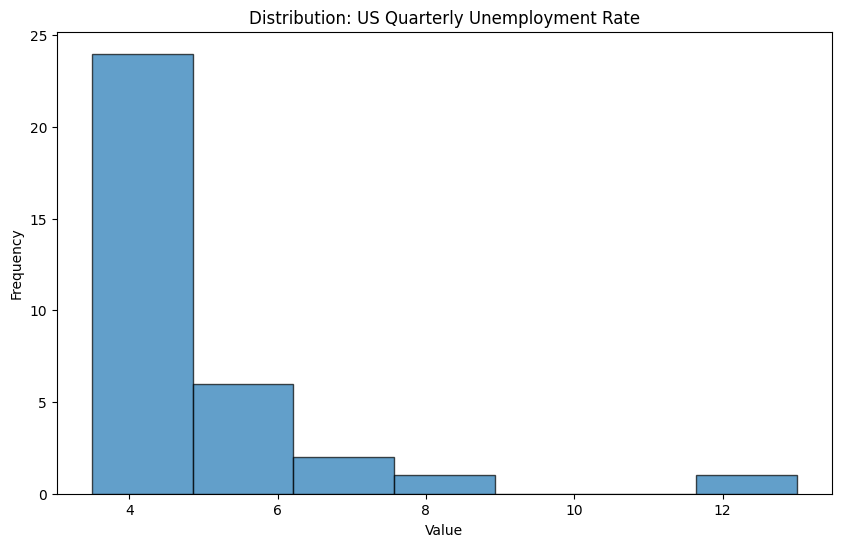

In [72]:
#Analyze the distribution of the US Prime Lending Rate per quarter 

plt.figure(figsize=(10, 6))
plt.hist(combined_df['unemployment_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: US Quarterly Unemployment Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above graph shows the distribution of the US quarterly unemployment between 2016-2024. The distribution shows that the unemployment rate is usually less than 5% with the exception of Covid times where the unemployment rate grew above 12%. 

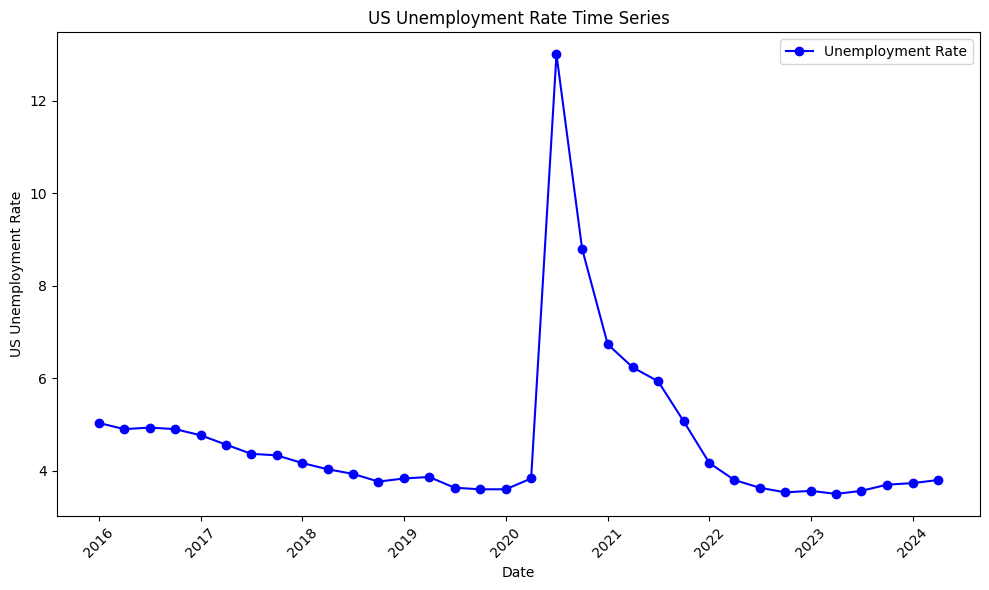

In [74]:
# Analyze the US prime lending rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['unemployment_rate'], marker='o', color='blue', label='Unemployment Rate')

# Add titles and labels
plt.title('US Unemployment Rate Time Series')
plt.xlabel('Date')
plt.ylabel('US Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The time series plot of the US unemployment rate shows that unemployment rates are rising in recent times, which indicates that this may be a risky period to be offering unsecured credit, since consumers may not have income to honor their loan repayments. 


#### Relationship Between Credit Defaults and Prime Lending Rate:

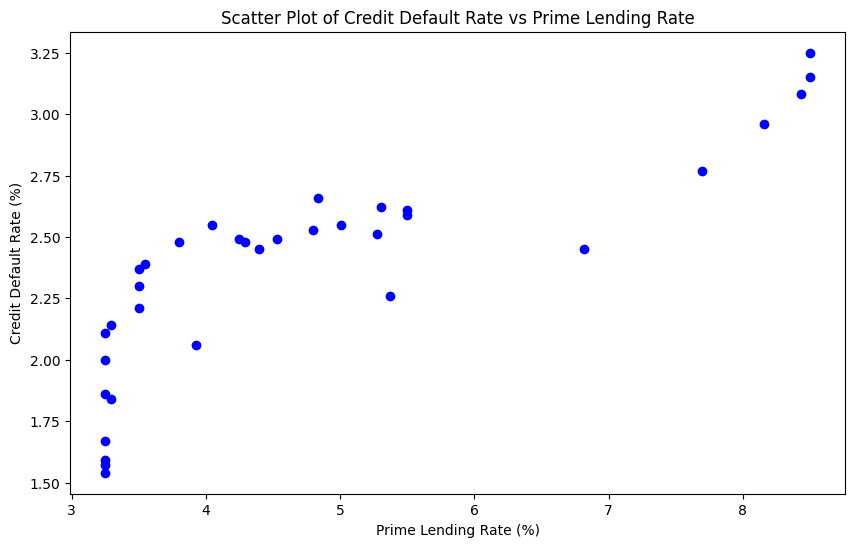

In [81]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['interest_rate'], combined_df['credit_default_rate'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Credit Default Rate vs Prime Lending Rate')
plt.xlabel('Prime Lending Rate (%)')
plt.ylabel('Credit Default Rate (%)')
plt.grid(visible=False)

# Show the plot
plt.show()


The above scatter plot shows that there is a strong positive, linear relationship which exists between the prime lending rate and the credit default rates. This means that we could use the current and forecasted prime lending rates to forecast potential credit defaults. 

#### Relationship Between Credit Defaults and Unemployment Rates:

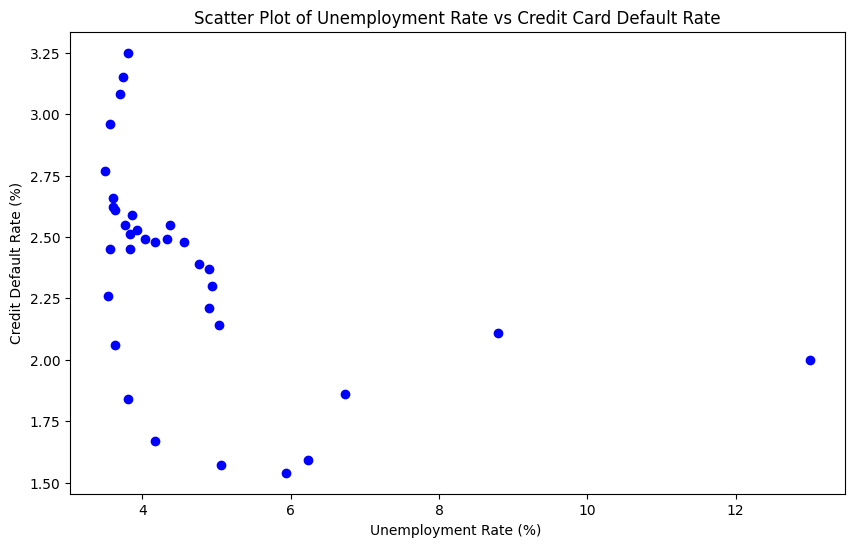

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['unemployment_rate'], combined_df['credit_default_rate'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Unemployment Rate vs Credit Card Default Rate')
plt.xlabel('Unemployment Rate (%) ')
plt.ylabel('Credit Default Rate (%)')
plt.grid(visible=False)

# Show the plot
plt.show()

The above graph shows that the relationship between the unemployment rate and the credit default rate is very weak and thus unemployment rate would be a poor predictor of credit default rate. This relationship may have resulted due to the unique covid periods where although unemployment rates were high, government interventions and bank policies were put in place to prevent consumers from defaulting. 

### Publicly Traded Bond: 

#### Datasets to obtain: 
1. Historical Performance of Bloomberg Barclays U.S. Aggregate Bond Index for the past 8 years. 
2. Historical inflation rates in the US for the past 8 years.
3. Historical economic growth rates in the US for the past 8 years. 

#### Fetch The Data:


In [107]:
# Define the ticker symbol for US Aggregate Bond Index
ticker = 'AGG'

# Download historical data
bond_index_df = pd.DataFrame(yf.download(ticker, start='2016-01-01', end='2024-03-31'))

#resample the data to get quarterly prices

bond_index_df = bond_index_df.resample('Q').mean().reset_index()
bond_index_df = bond_index_df[['Date', 'Close']]
bond_index_df

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2016-03-31,109.438196
1,2016-06-30,111.045781
2,2016-09-30,112.438438
3,2016-12-31,109.560635
4,2017-03-31,108.192420
5,2017-06-30,109.308254
6,2017-09-30,109.775714
7,2017-12-31,109.325556
8,2018-03-31,107.362295
9,2018-06-30,106.041406


In [163]:
#Get US Inflation Data from the FED
# Set the start and end dates
start_date = '2016-01-01'
end_date = '2024-03-31'

# Fetch the CPI data from FRED
cpi_data_df = pd.DataFrame(web.get_data_fred('MEDCPIM158SFRBCLE', start=start_date, end=end_date))

# Resample to quarterly and calculate inflation rate
cpi_data_df = cpi_data_df.resample('Q').mean().reset_index()
cpi_data_df


,DATE,MEDCPIM158SFRBCLE
0,2016-03-31,2.489379
1,2016-06-30,3.069796
2,2016-09-30,2.577022
3,2016-12-31,2.171747
4,2017-03-31,2.881012
5,2017-06-30,1.854570
6,2017-09-30,2.422369
7,2017-12-31,2.600368
8,2018-03-31,2.715060
9,2018-06-30,2.848653


In [164]:
#Get US economic growth rates from FRED

# Set the start date
start_date = '2016-1-1'

# Fetch the Real GDP data from FRED
gdp_data = web.get_data_fred('GDP', start=start_date)

# Calculate GDP growth rates (quarter-over-quarter)
gdp_growth_rate_df = gdp_data.pct_change() * 100  # Convert to percentage

# Display the quarterly GDP growth rates
gdp_growth_rate_df = gdp_growth_rate_df.iloc[1:].reset_index()
gdp_growth_rate_df


,DATE,GDP
0,2016-04-01,1.002751
1,2016-07-01,0.966972
2,2016-10-01,1.041358
3,2017-01-01,0.999011
4,2017-04-01,0.822398
5,2017-07-01,1.306429
6,2017-10-01,1.749353
7,2018-01-01,1.454628
8,2018-04-01,1.241402
9,2018-07-01,1.058350


In [166]:
#combine the three dataframes into one dataframe for analysis

combined_df = bond_index_df.copy()
combined_df.rename(columns={'Close': 'bond_index_close'}, inplace=True)
combined_df['inflation_rate'] = cpi_data_df['MEDCPIM158SFRBCLE']
combined_df['gdp_growth'] = gdp_growth_rate_df['GDP']
combined_df

,Date,bond_index_close,inflation_rate,gdp_growth
0,2016-03-31,109.438196,2.489379,1.002751
1,2016-06-30,111.045781,3.069796,0.966972
2,2016-09-30,112.438438,2.577022,1.041358
3,2016-12-31,109.560635,2.171747,0.999011
4,2017-03-31,108.192420,2.881012,0.822398
5,2017-06-30,109.308254,1.854570,1.306429
6,2017-09-30,109.775714,2.422369,1.749353
7,2017-12-31,109.325556,2.600368,1.454628
8,2018-03-31,107.362295,2.715060,1.241402
9,2018-06-30,106.041406,2.848653,1.058350


#### Analyze the Data:

In [195]:
combined_df[['bond_index_close','inflation_rate','gdp_growth']].describe()

,bond_index_close,inflation_rate,gdp_growth
count,33.000000,33.000000,33.000000
mean,108.210400,3.624810,1.355426
std,6.643833,1.667292,2.271833
min,95.166032,1.519074,-8.261898
25%,104.891429,2.577022,0.999011
50%,109.343492,2.881012,1.329796
75%,112.687500,4.260233,1.749353
max,118.622187,7.507740,8.710313


#### Bond Prices: 

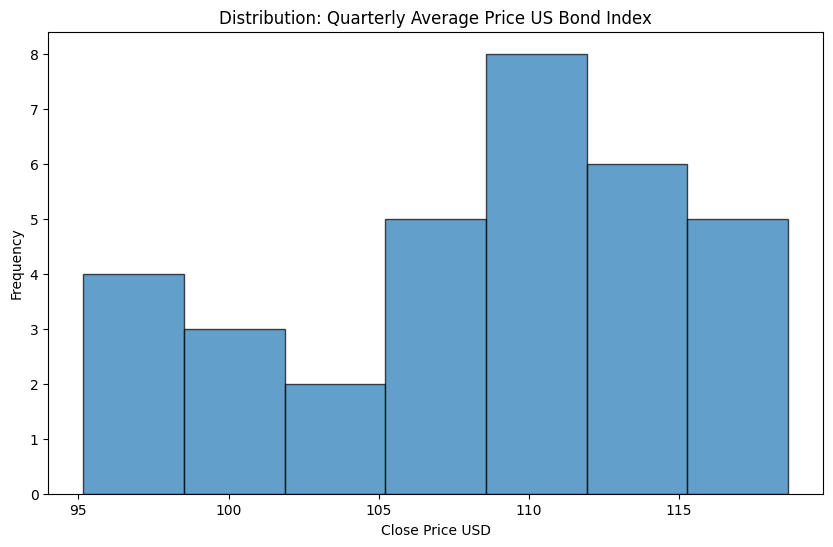

In [178]:
# Analyze the distribution of the US Bond Close Prices

plt.figure(figsize=(10, 6))
plt.hist(combined_df['bond_index_close'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly Average Price US Bond Index')
plt.xlabel('Close Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution shows us that the bond prices for US Bonds are not normally distributed, but rather follow a bimodal distribution. This is an important insight in determining methods for forecasting expected returns. The distribution also shows that bond prices are not very volatile, which can reduce some of the risk associated with investing in this type of asset. 

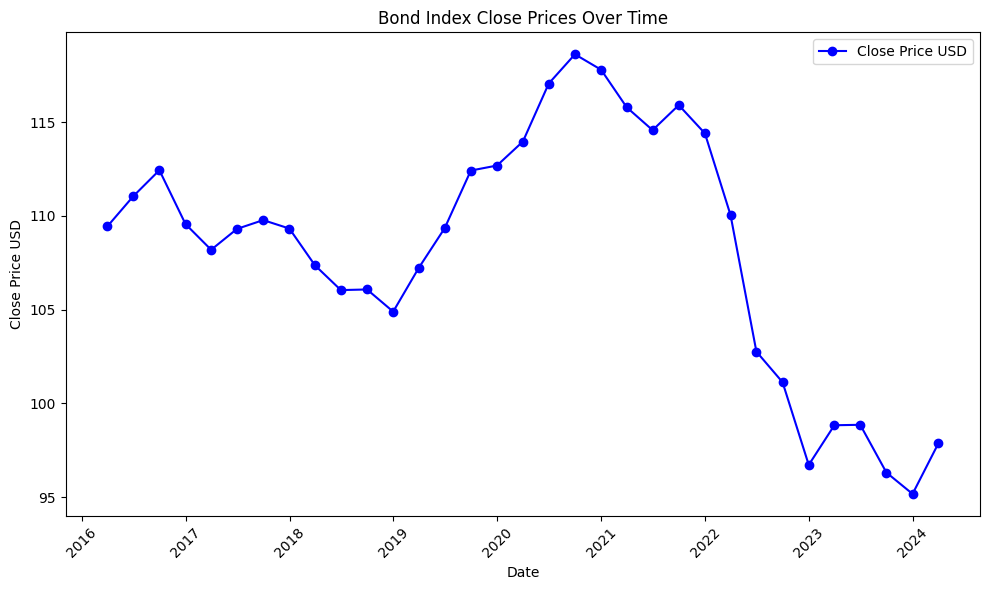

In [182]:
# Analyze the US Bond Prices over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['bond_index_close'], marker='o', color='blue', label='Close Price USD')

# Add titles and labels
plt.title('Bond Index Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot for the US Bond Index shows that bond prices have fallen quite significantly in recent periods. This is inline with expectations, given the high interest rate environment that currently exists globally. This insight is important because it allows us to assess our entry position in the bond market as well as understand global trends which are currently in motion. 

#### Inflation Rate: 

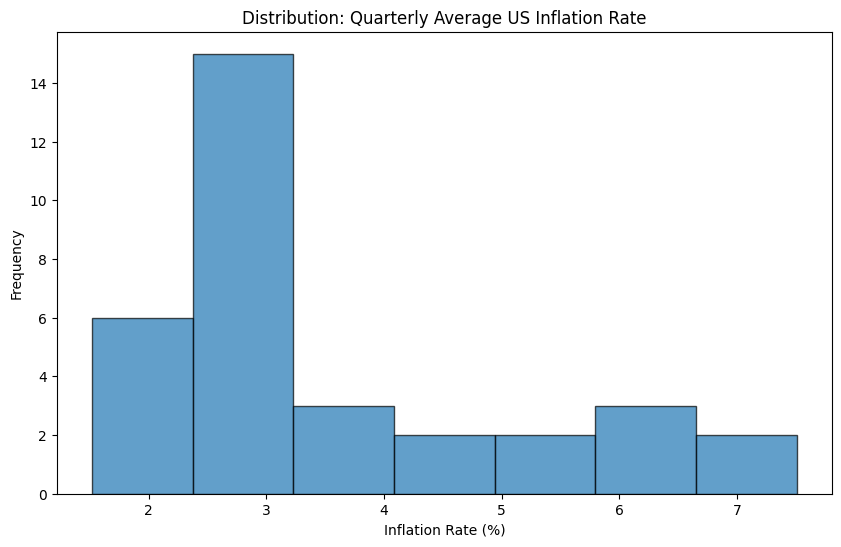

In [203]:
# Analyze the distribution of the US Inflation Rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['inflation_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly Average US Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that inflation in the US can be quite volatile, having a large range > 6%. The data is also quite skewed to the right indicating the presence of outlier quarters. This volatility is important to anticipate due to the impact it can have on forecasting returns. 

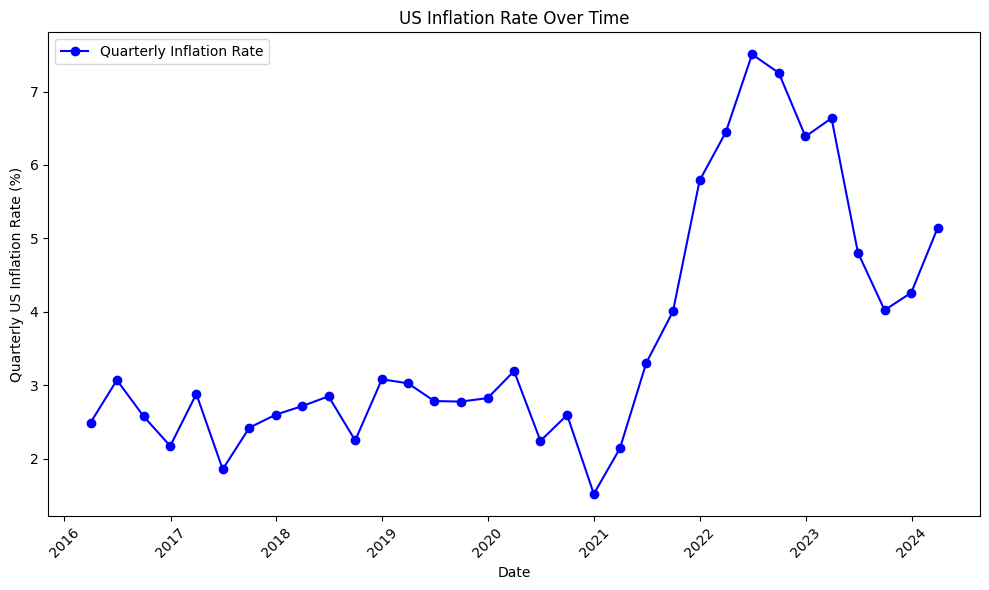

In [194]:
# Analyze the US Inflation Rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['inflation_rate'], marker='o', color='blue', label='Quarterly Inflation Rate')

# Add titles and labels
plt.title('US Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Quarterly US Inflation Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that in recent periods, inflation in the US has risen rapidly and sits way above historical averages. It is important to understand this inflation trend, because inflation rates can have an impact on the prices and profitability of bonds and thus play an important role in assessing the risk associated with bond products. 

#### Economic Growth Rate: 

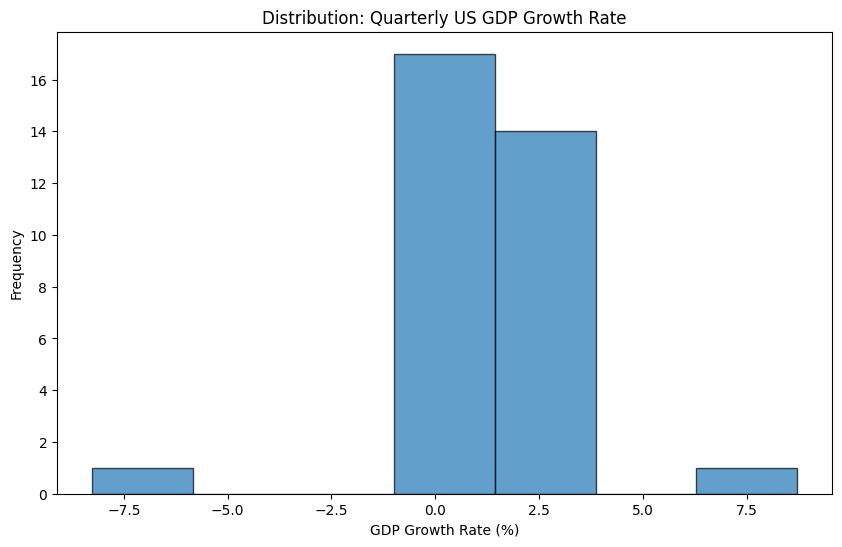

In [190]:
# Analyze the distribution of the US Economic Growth Rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['gdp_growth'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that economic growth rates in the US are fairly stable between 0 and 3%. It also however shows that shocks can occur in the economy which has caused the presence of outliers which can be seen from the distribution plot. These outlier periods can have an impact on bond prices and need to be accounted for when assessing risk. 

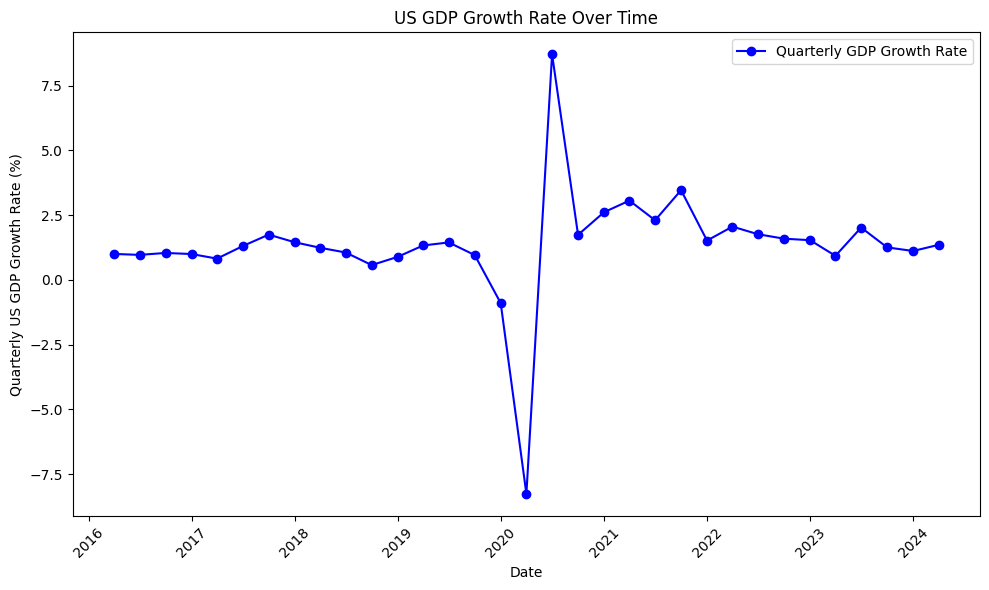

In [193]:
# Analyze the US GDP Growth Rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['gdp_growth'], marker='o', color='blue', label='Quarterly GDP Growth Rate')

# Add titles and labels
plt.title('US GDP Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Quarterly US GDP Growth Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that the US GDP growth has been relatively stable throughout recent history, however the effects of economic shocks such as Covid are clearly visible. Since these shocks will have an impact on bond prices in the US it is important to be aware of the potential impact they can have on the economy.  

#### Correlation Analysis: 

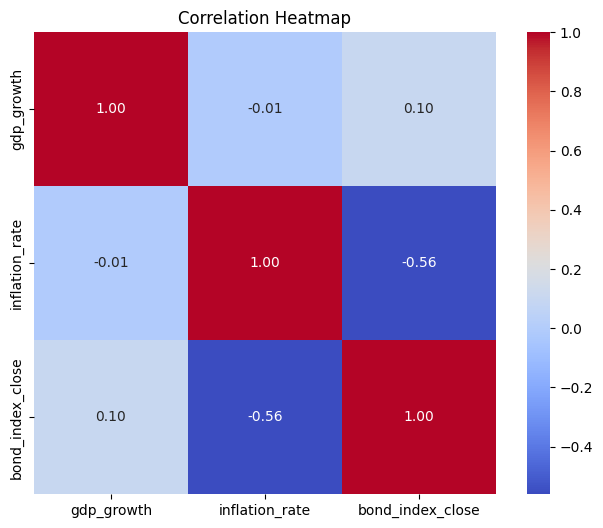

In [202]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = combined_df[['gdp_growth', 'inflation_rate', 'bond_index_close']].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Title and show the plot
plt.title('Correlation Heatmap')
plt.show()

The above heatmap shows that there is a moderate, negative correlation between the inflation rate in the US and the bond price index. This confirms our initial concern around how changes in inflation and interest rates in the US may affect bond prices. 